In [1]:
import pandas as pd
import numpy as np

In [2]:
col_names = ["age", "workclass", "finalweight", "education", "eduction-num", "marital_status", 
                "occupation", "relationship", "race", "sex", "captial-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]

In [3]:
df = pd.read_csv("adult.csv",  names=col_names)
df.head()

,age,workclass,finalweight,education,eduction-num,marital_status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.to_csv("adult-formated.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   eduction-num    32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  captial-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

age               0
workclass         0
finalweight       0
education         0
eduction-num      0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
captial-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
df.shape

(32561, 15)

In [8]:
for column in df.columns:
    print(f"{column} = {df[df[column] == '?'].shape[0]}")

age = 0
workclass = 0
finalweight = 0
education = 0
eduction-num = 0
marital_status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
captial-gain = 0
capital-loss = 0
hours-per-week = 0
native-country = 0
income = 0


In [9]:
df["workclass"][df["workclass"] == "?"] = df["workclass"].mode()[0]
df["occupation"][df["occupation"] == "?"] = df["occupation"].mode()[0]
df["native-country"][df["native-country"] == "?"] = df["native-country"].mode()[0]

C:\Users\mansi\AppData\Local\Temp\ipykernel_4184\1395414051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["workclass"][df["workclass"] == "?"] = df["workclass"].mode()[0]
C:\Users\mansi\AppData\Local\Temp\ipykernel_4184\1395414051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["occupation"][df["occupation"] == "?"] = df["occupation"].mode()[0]
C:\Users\mansi\AppData\Local\Temp\ipykernel_4184\1395414051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
for column in df.columns:
    print(f"{column} = {df[df[column] == '?'].shape[0]}")

age = 0
workclass = 0
finalweight = 0
education = 0
eduction-num = 0
marital_status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
captial-gain = 0
capital-loss = 0
hours-per-week = 0
native-country = 0
income = 0


### Detecting and removing outliers

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
int_columns = ['age','finalweight','eduction-num','captial-gain','capital-loss','hours-per-week']

In [13]:
def plot_boxplot(df, ft):
    sns.boxplot(df[ft])
    plt.title(f'Box plot without outliers of {ft}')
    plt.show()

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


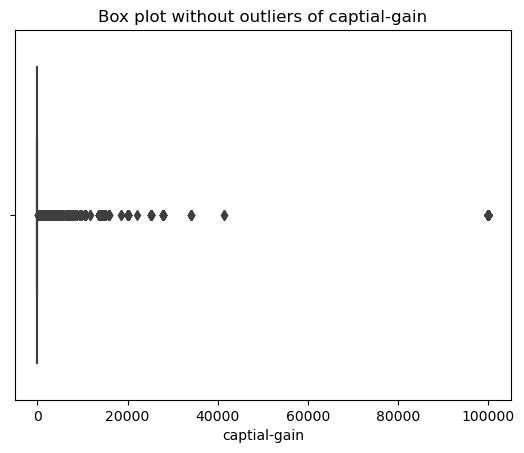

In [14]:
plot_boxplot(df, 'captial-gain')

#### Remove outliers

In [15]:
# 1. Extract all the indexes of outliers from column
# 2. remove those indexes from dataframe

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    # Calculate Inter quartile range IQR
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Storing indexes of outliers

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

    return ls

In [16]:
# Create empty list to store the output indices from multiple columns
index_list = []

for feature in int_columns:
    index_list.extend(outliers(df, feature))

# Now index_list array contains index of all rows which are outlier

In [17]:
# function which returns cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [18]:
df_cleaned = remove(df, index_list)

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


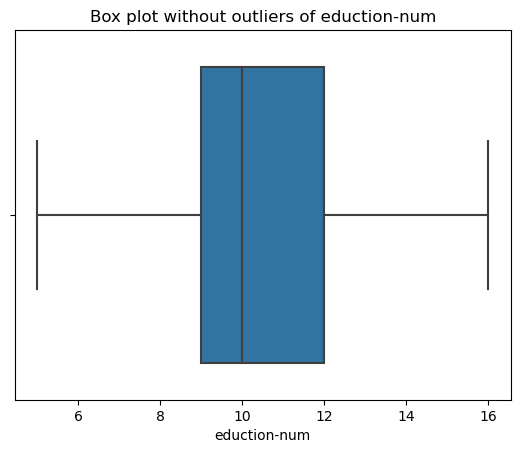

In [19]:
plot_boxplot(df_cleaned, 'eduction-num')

In [20]:
df_cleaned

,age,workclass,finalweight,education,eduction-num,marital_status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### Visualization

#### Histogram
Objective: To visualize the distribution of a single continuous variable, such as age, education-num, capital-gain, or capital-loss. Histograms help us understand the underlying frequency distribution of the data and identify any patterns or outliers

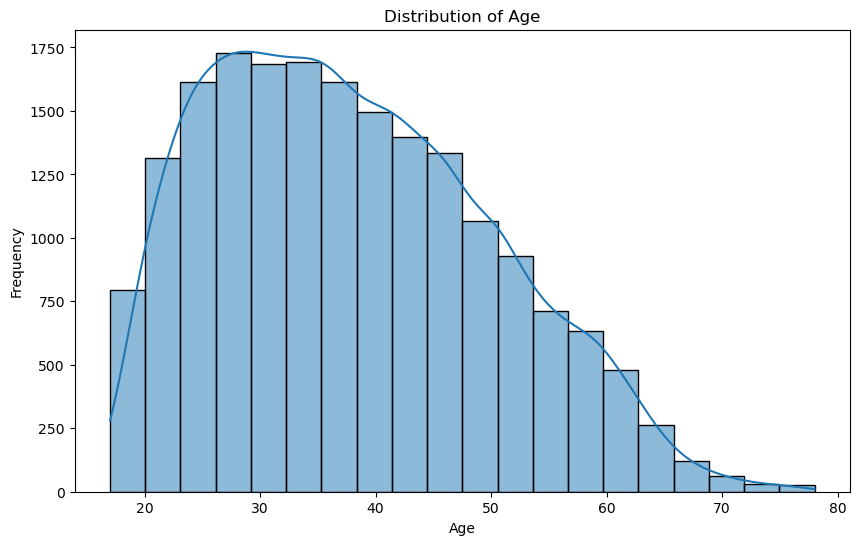

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Dot Plots:

Objective: Dot plots can be used to compare the values of a continuous variable across different categories. For example, you could create a dot plot showing the distribution of ages within different education levels or work classes. Dot plots help in visualizing the spread and central tendency of the data within each category.

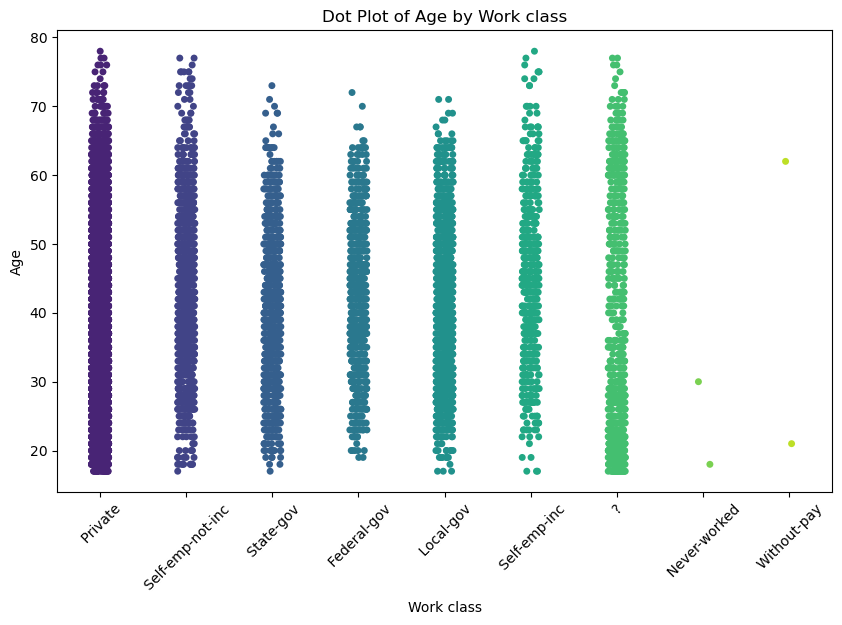

In [60]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='workclass', y='age', data=df_cleaned, jitter=True, palette='viridis')
plt.title('Dot Plot of Age by Work class')
plt.xlabel('Work class')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

#### Bar Plots:

Objective: Bar plots are useful for comparing the frequency or distribution of a categorical variable across different categories. You could create bar plots to show the number of individuals in each income category for different native countries or races. Bar plots help in visualizing the distribution of categorical data and identifying any patterns or discrepancies.


In [61]:
temp = df_cleaned[df_cleaned["income"] == '>50K']

country_vs_age = df_cleaned[["native-country","income","age"]].groupby(["native-country","income"]).mean()


In [62]:
country_vs_age

age
native-country income           
 ?              <=50K  35.622047
                >50K   43.780822
 Cambodia       <=50K  40.000000
                >50K   41.666667
 Canada         <=50K  41.520833
...                          ...
 United-States  >50K   43.808238
 Vietnam        <=50K  31.657895
                >50K   30.000000
 Yugoslavia     <=50K  33.714286
                >50K   34.666667

[78 rows x 1 columns]

In [49]:
country_vs_age = country_vs_age.reset_index()


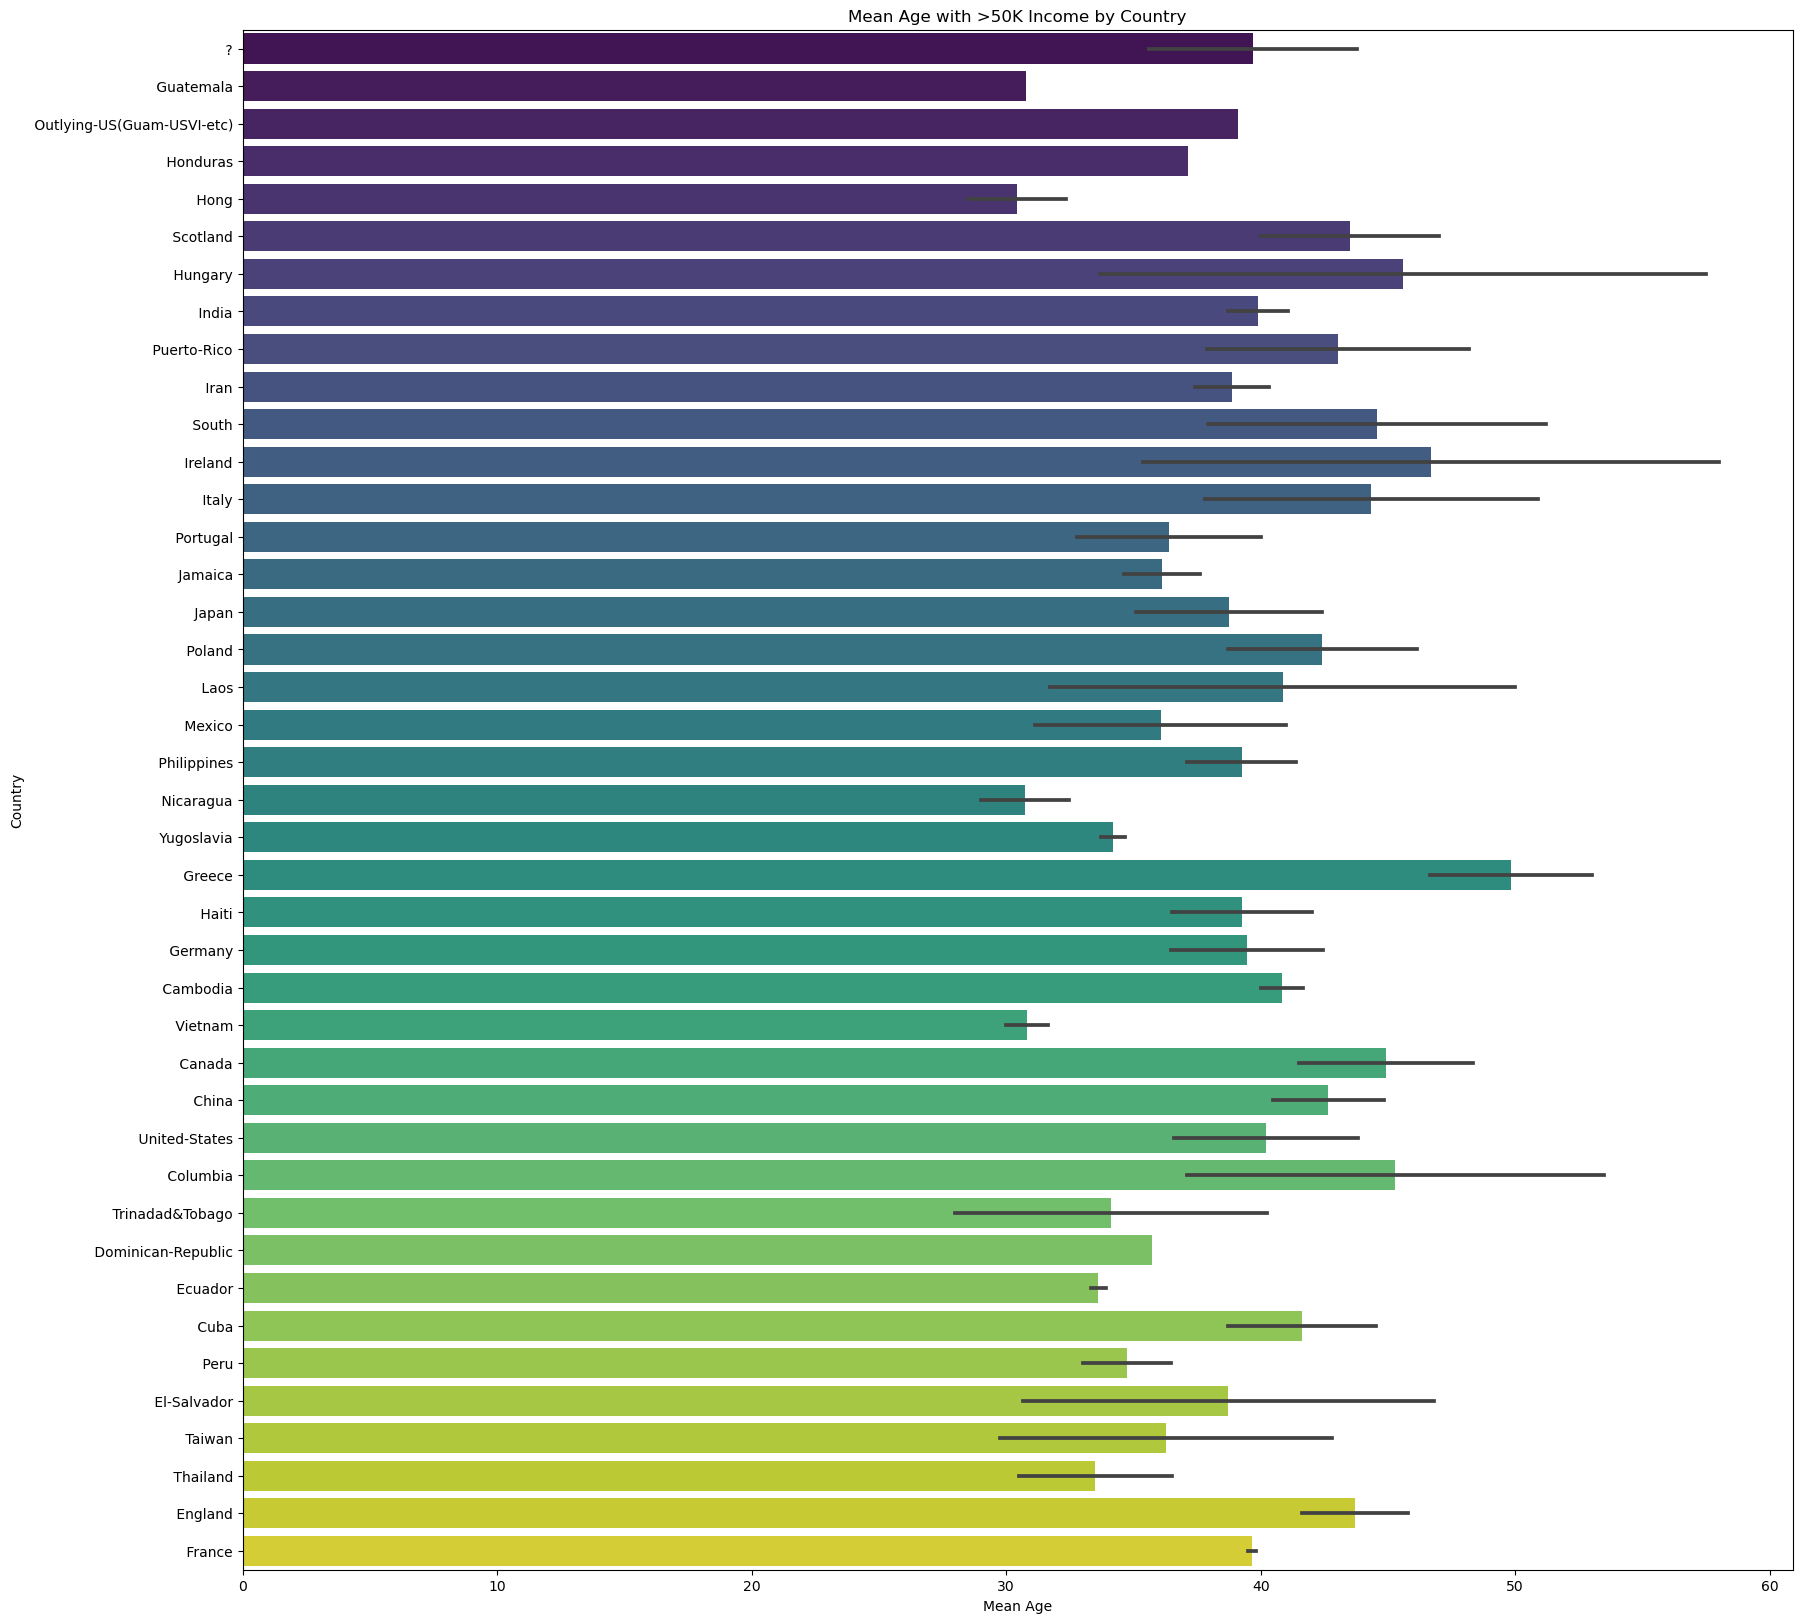

In [50]:
plt.figure(figsize = (20,20))
sns.barplot(x = "age", y = "native-country", data = country_vs_age, palette = "viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()


#### Line Charts:

Objective: Line charts are typically used to visualize trends over time. However, in this dataset, since we don't have a time-related variable, we can use line charts to show the relationship between two continuous variables, such as age and hours-per-week. Line charts help in understanding the relationship or correlation between two continuous variables.

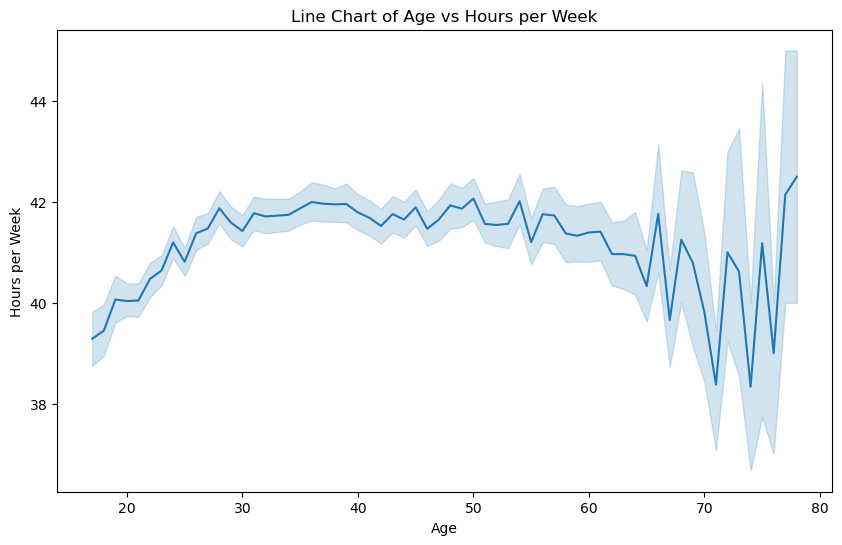

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='hours-per-week', data=df_cleaned)
plt.title('Line Chart of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

#### Combined Visualization (Histogram, Scatter plot, Box plot):

Objective: This combined visualization allows us to compare the distribution of a single continuous variable (histogram), the relationship between two continuous variables (scatter plot), and the summary statistics of the variable (box plot) in a single plot. This provides a comprehensive view of the variable, including its distribution, central tendency, spread, and any outliers.


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


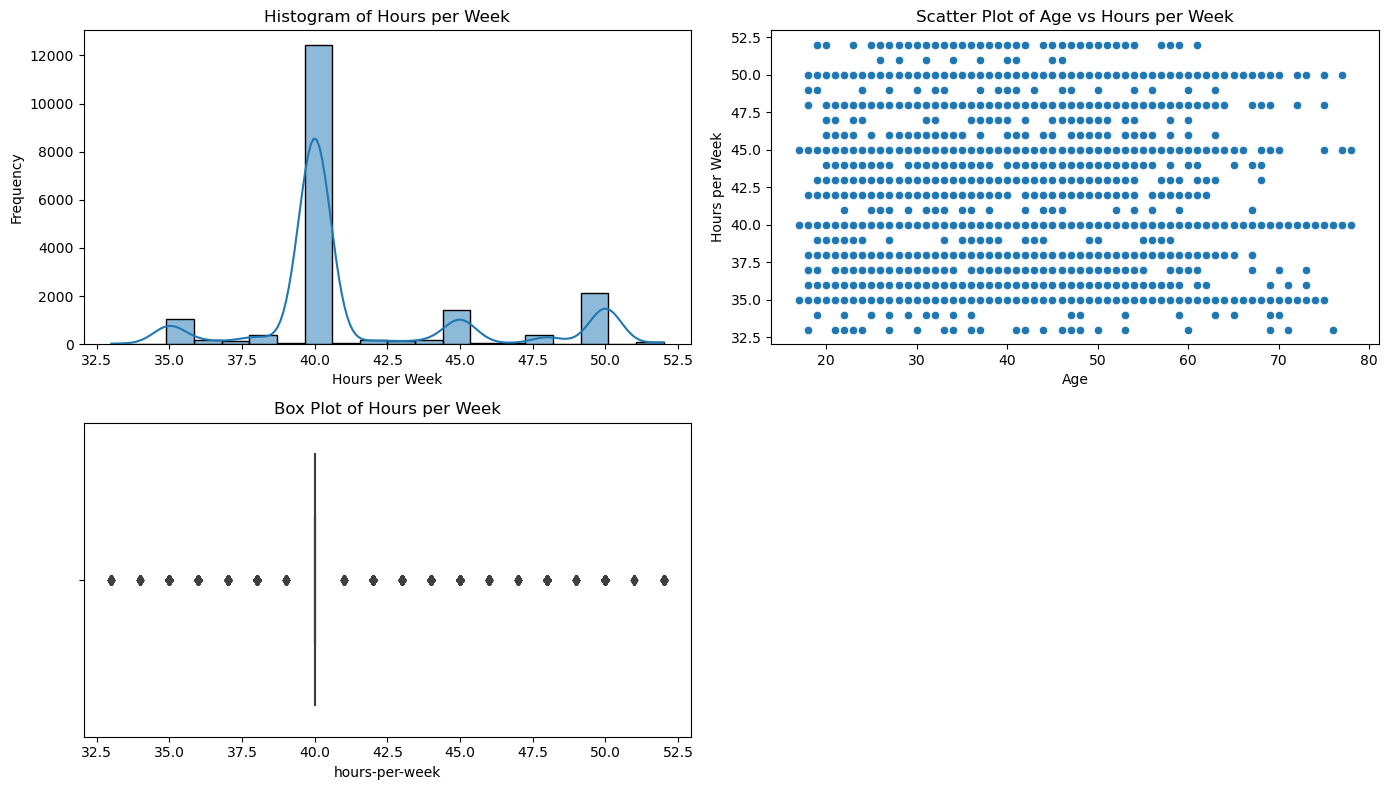

In [27]:
plt.figure(figsize=(14, 8))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['hours-per-week'], bins=20, kde=True)
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='hours-per-week', data=df_cleaned)
plt.title('Scatter Plot of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(df_cleaned['hours-per-week'])
plt.title('Box Plot of Hours per Week')

plt.tight_layout()
plt.show()


#### Pie chart


In [28]:
df_cleaned.head()

,age,workclass,finalweight,education,eduction-num,marital_status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [29]:
df_cleaned["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [30]:
df_cleaned[df_cleaned["sex"] == " Female"].count().unique()

array([6285], dtype=int64)

In [31]:
df_cleaned[df_cleaned["sex"] == " Male"].shape[0]

12712

In [32]:
df_cleaned['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:ylabel='sex'>

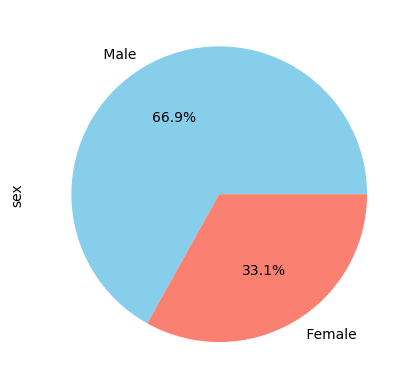

In [39]:
df_cleaned['sex'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'salmon'])

In [33]:
# Count males and females with income >50K
males_high_income = df_cleaned[(df_cleaned['sex'] == ' Male') & (df_cleaned['income'] == ' >50K')].shape[0]
females_high_income = df_cleaned[(df_cleaned['sex'] == ' Female') & (df_cleaned['income'] == ' >50K')].shape[0]

# Count males and females with income <=50K
males_low_income = df_cleaned[(df_cleaned['sex'] == ' Male') & (df_cleaned['income'] == ' <=50K')].shape[0]
females_low_income = df_cleaned[(df_cleaned['sex'] == ' Female') & (df_cleaned['income'] == ' <=50K')].shape[0]

print("Number of males with income >50K:", males_high_income)
print("Number of females with income >50K:", females_high_income)
print("Number of males with income <=50K:", males_low_income)
print("Number of females with income <=50K:", females_low_income)

Number of males with income >50K: 3433
Number of females with income >50K: 588
Number of males with income <=50K: 9279
Number of females with income <=50K: 5697


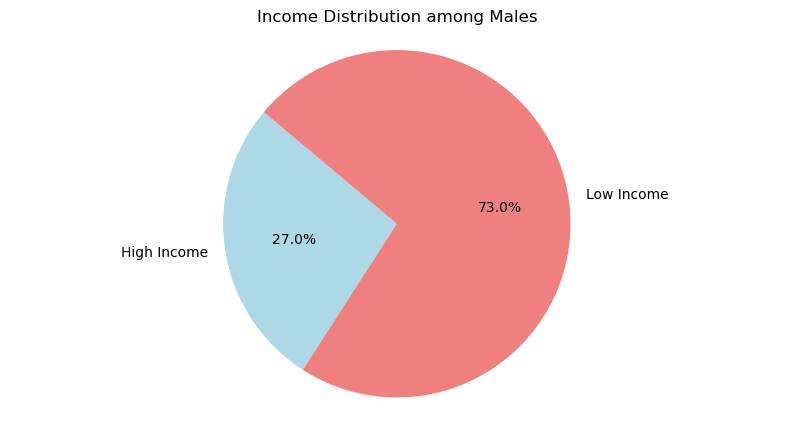

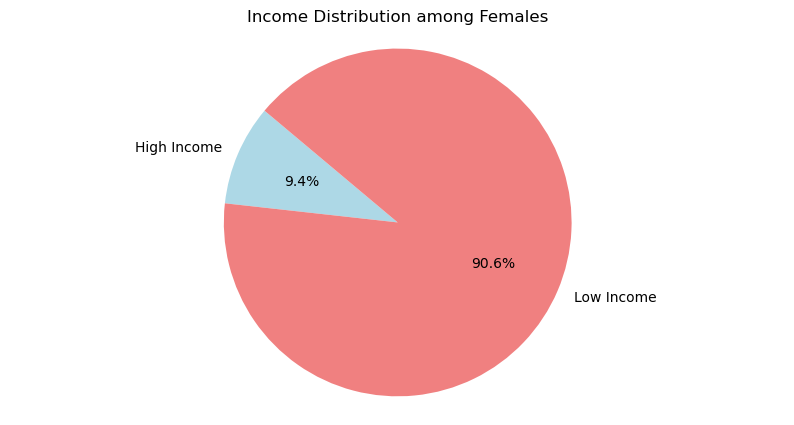

In [41]:
males = [males_high_income, males_low_income]
females = [females_high_income, females_low_income]
labels = ['High Income', 'Low Income']
colors = ['lightblue', 'lightcoral']

# Plotting pie chart for males
plt.figure(figsize=(10, 5))
plt.pie(males, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Income Distribution among Males')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Plotting pie chart for females
plt.figure(figsize=(10, 5))
plt.pie(females, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Income Distribution among Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()